In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import cv2                 # working with, mainly resizing, images
import numpy as np         # dealing with arrays
import os                  # dealing with directories
from random import shuffle # mixing up or currently ordered data that might lead our network astray in training.
from tqdm import tqdm      # a nice pretty percentage bar for tasks. Thanks to viewer Daniel Bühler for this suggestion


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output

%cd /kaggle/working

TRAIN_DIR = '../input/dogs-vs-cats-redux-kernels-edition/train'
TEST_DIR = '../input/dogs-vs-cats-redux-kernels-edition/test'

#print(check_output(["ls", "./"]).decode("utf8"))

IMG_SIZE = 50
LR = 1e-3

#MODEL_NAME = 'dogsvscats-{}-{}.model'.format(LR, '2conv-basic') # just so we remember which saved model is which, sizes must match

ModuleNotFoundError: No module named 'cv2'

In [4]:
def label_img(img):
    word_label = img.split('.')[-3]
    # conversion to one-hot array [cat,dog]
    #                            [much cat, no dog]
    if word_label == 'cat': return [1]
    #                             [no cat, very doggo]
    elif word_label == 'dog': return [0]
    
def create_train_data():
    training_data = []
    for img in tqdm(os.listdir(TRAIN_DIR)):
        label = label_img(img)
        path = os.path.join(TRAIN_DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        training_data.append([img,label])
    
    #cv2.imshow("foo", img)
    shuffle(training_data)
    
    training_data = np.array(training_data)
    np.save('train_data.npy', training_data)
    return training_data

def process_test_data():
    testing_data = []
    for img in tqdm(os.listdir(TEST_DIR)):
        path = os.path.join(TEST_DIR,img)
        img_num = img.split('.')[0]
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        testing_data.append([np.array(img), img_num])
        
    shuffle(testing_data)
    np.save('test_data.npy', testing_data)
    return testing_data


train_data = create_train_data()
test_data = process_test_data()
# If you have already created the dataset:
#train_data = np.load('train_data.npy')
#test_data = np.load('test_data.npy')

NameError: name 'tqdm' is not defined

In [5]:
from matplotlib import pyplot as plt

from PIL import Image
#plt.imshow(train_data[0][0])
Image.fromarray(train_data[2][0])

NameError: name 'train_data' is not defined

In [4]:
from keras.models import Sequential, Model, load_model
from keras.applications.vgg16 import VGG16

from keras import optimizers
from keras.layers import Dropout, Flatten, Dense, Activation

from keras.models import Sequential
from keras import utils

Using TensorFlow backend.


In [5]:
# Weights for VGG16
from os import listdir, makedirs
from os.path import join, exists, expanduser

img_rows, img_cols, img_channel = IMG_SIZE, IMG_SIZE, 3

WEIGHTS_DIR = '../input/vgg16'

cache_dir = expanduser(join('~', '.keras'))
if not exists(cache_dir):
    makedirs(cache_dir)
models_dir = join(cache_dir, 'models')
if not exists(models_dir):
    makedirs(models_dir)
print(check_output(["ls", WEIGHTS_DIR]).decode("utf8"))
!cp ../input/vgg16/*notop* ~/.keras/models/


imagenet_class_index.json
vgg16_weights_tf_dim_ordering_tf_kernels.h5
vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5



In [6]:
train = train_data[:-500]
test = train_data[-500:]

In [7]:
X = np.array([i[0] for i in train]).reshape(-1,IMG_SIZE,IMG_SIZE,3)
Y = [i[1] for i in train]

In [8]:
test_x = np.array([i[0] for i in test]).reshape(-1,IMG_SIZE,IMG_SIZE,3)
test_y = np.array([i[1] for i in test])

In [9]:
from keras import backend as K

#model = VGG16(weights='imagenet', include_top=False, input_shape=(img_rows, img_cols, img_channel))


model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(IMG_SIZE, IMG_SIZE, 3)))
#model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))

    # this converts our 3D feature maps to 1D feature vectors
model.add(Flatten())
#model.add(Dense(64))  # we now have numbers not 'images'
#model.add(Activation('relu'))
#model.add(Dropout(0.5))

    # Output Layer
model.add(Dense(1))
#model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

model.fit(X[:600], np.array(Y)[:600], epochs=1, batch_size=600, verbose=1)

NameError: name 'Conv2D' is not defined

In [10]:
from keras.layers import Activation, Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from keras.models import Sequential


def shallow_net():
    model = Sequential()

    model.add(Conv2D(32, (3, 3), input_shape=(IMG_SIZE, IMG_SIZE, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # this converts our 3D feature maps to 1D feature vectors
    model.add(Flatten())

    model.add(Dense(64))  # we now have numbers not 'images'
    model.add(Activation('relu'))
    model.add(Dropout(0.5))

    # Output Layer
    model.add(Dense(1))
    model.add(Activation('sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    
    return model

model = shallow_net()

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#model.summary()


model.fit(X, np.array(Y), epochs=1, batch_size=6000, verbose=1)



Epoch 1/1
24500/24500 [==============================] - 60s 2ms/step - loss: 7.5484 - acc: 0.5041


1.0% likelihood it is a cat


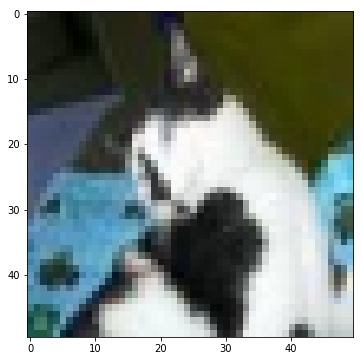

In [11]:

import random

d = random.choice(test_data)
img_data, img_num = d
data = cv2.resize(img_data, (IMG_SIZE,IMG_SIZE))
prediction = model.predict(np.array([data]))[0]

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)
ax.imshow(img_data, cmap="gray")
print(f"{prediction[0]}% likelihood it is a cat")